In [3]:
from fastai.vision.all import *

In [4]:
from fastai.data.external import untar_data

path = untar_data(URLs.MNIST_SAMPLE)

In [5]:
path.ls()

(#3) [Path('/home/avgdev/.fastai/data/mnist_sample/labels.csv'),Path('/home/avgdev/.fastai/data/mnist_sample/train'),Path('/home/avgdev/.fastai/data/mnist_sample/valid')]

In [6]:
(path/'train').ls()

(#2) [Path('/home/avgdev/.fastai/data/mnist_sample/train/7'),Path('/home/avgdev/.fastai/data/mnist_sample/train/3')]

In [7]:
threes = (path/'train'/'3').ls().sorted()
threes

(#6131) [Path('/home/avgdev/.fastai/data/mnist_sample/train/3/10.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/3/10000.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/3/10011.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/3/10031.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/3/10034.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/3/10042.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/3/10052.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/3/1007.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/3/10074.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/3/10091.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/3/10093.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/3/10097.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/3/10099.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/3/10116.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/3/10125.png'),Path('/home/avgdev/.

In [8]:
sevens = (path/'train'/'7').ls().sorted()
sevens

(#6265) [Path('/home/avgdev/.fastai/data/mnist_sample/train/7/10002.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/7/1001.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/7/10014.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/7/10019.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/7/10039.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/7/10046.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/7/10050.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/7/10063.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/7/10077.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/7/10086.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/7/10095.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/7/10096.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/7/101.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/7/10131.png'),Path('/home/avgdev/.fastai/data/mnist_sample/train/7/1014.png'),Path('/home/avgdev/.

In [9]:
from PIL import Image

In [10]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [11]:
im7_path = sevens[1]
im7 = Image.open(im7_path)
im7

In [12]:

import numpy as np

In [20]:
np.array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

In [14]:
import torch as t

In [18]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

In [21]:
import pandas as pd

In [22]:
im3_t = tensor(im3)[4:15,4:22]
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [23]:
three_tensors = [tensor(Image.open(im_path)) for im_path in threes]
seven_tensors = [tensor(Image.open(im_path)) for im_path in sevens]

In [24]:
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

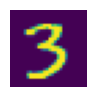

In [25]:
show_image(three_tensors[1])

In [26]:
stacked_threes = torch.stack(three_tensors).float() / 255
stacked_sevens = torch.stack(seven_tensors).float() / 255

stacked_threes.shape, stacked_sevens.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

<Axes: >

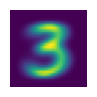

In [27]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

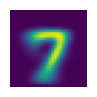

In [28]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

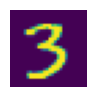

In [29]:
a_3 = stacked_threes[1]
show_image(a_3)

<Axes: >

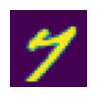

In [31]:
a_7 = stacked_sevens[1]
show_image(a_7)

In [30]:
dist3_abs = (a_3 - mean3).abs().mean()
dist3_sqr = ((a_3 - mean3)**2).mean().sqrt()

dist3_abs, dist3_sqr

(tensor(0.1114), tensor(0.2021))

In [33]:
dist7_abs = (a_3 - mean7).abs().mean()
dist7_sqr = ((a_3 - mean7)**2).mean().sqrt()

dist7_abs, dist7_sqr

(tensor(0.1586), tensor(0.3021))

In [37]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens / 255.0

valid_3_tens.shape

torch.Size([1010, 28, 28])

In [38]:
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens / 255.0

valid_7_tens.shape

torch.Size([1028, 28, 28])

In [39]:
def mnist_distance(a, b):
    return (a - b).abs().mean((-1, -2))

mnist_distance(a_3, mean3)

tensor(0.1114)

In [40]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)

valid_3_dist

tensor([0.1079, 0.1422, 0.1320,  ..., 0.1043, 0.1410, 0.1380])

In [42]:
valid_7_dist = mnist_distance(valid_7_tens, mean3)

valid_7_dist

tensor([0.1831, 0.1389, 0.1583,  ..., 0.1525, 0.1586, 0.1544])

In [43]:
def is_3(x):
    return mnist_distance(x, mean3) < mnist_distance(x, mean7)



In [44]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [45]:
accuracy_3 = is_3(valid_3_tens).float().mean()
accuracy_7 = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3, accuracy_7

(tensor(0.9168), tensor(0.9854))

In [46]:
stacked_threes

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [103]:
catted = torch.cat([stacked_threes, stacked_sevens])

In [104]:
catted

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0., 

In [105]:
catted.shape

torch.Size([12396, 28, 28])

In [106]:
train_x = catted.view(-1, 28*28)

In [107]:
train_x.shape

torch.Size([12396, 784])

In [108]:
train_y_temp = torch.tensor([1]*len(threes) + [0]*len(sevens))

train_y_temp.shape

torch.Size([12396])

In [109]:
train_y = train_y_temp.unsqueeze(1)

In [110]:
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [111]:
dset = list(zip(train_x, train_y))
len(dset), len(dset[0][0]),len(dset[0][1])

(12396, 784, 1)

In [112]:

valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = torch.tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)

valid_x.shape, valid_y.shape

(torch.Size([2038, 784]), torch.Size([2038, 1]))

In [113]:
valid_dset = list(zip(valid_x, valid_y))

valid_dset[0][0].shape, valid_dset[0][1].shape

(torch.Size([784]), torch.Size([1]))

In [140]:
def init_params(size, std=1):
    return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28, 1))

weights.shape

torch.Size([784, 1])

In [141]:
bias = init_params(1)
bias

tensor([-0.4257], requires_grad=True)

In [142]:
(train_x[0]*weights.T).sum() + bias

tensor([8.1338], grad_fn=<AddBackward0>)

In [143]:
def linear1(xb):
    return xb@weights + bias

preds = linear1(train_x)

preds.shape

torch.Size([12396, 1])

In [144]:
train_y.shape

torch.Size([12396, 1])

In [145]:
corrects = (preds>0.0).float() == train_y


In [146]:
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [False]])

In [147]:
corrects.float().mean().item()

0.701435923576355

In [149]:
weights[0]

tensor([0.9613], grad_fn=<SelectBackward0>)

In [151]:
with torch.no_grad():
    weights[0] *= 1.0001
preds = linear1(train_x)

((preds>0.0).float() == train_y).float().mean().item()

0.701435923576355

In [161]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1,1-predictions, predictions).mean()

In [175]:
weights= init_params((28*28, 1))
bias = init_params(1)

In [176]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [177]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [178]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [179]:
preds = linear1(batch)
preds

tensor([[-1.0361],
        [11.1583],
        [ 6.3964],
        [ 1.2940]], grad_fn=<AddBackward0>)

In [180]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.2387, grad_fn=<MeanBackward0>)

In [181]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0144), tensor([-0.0910]))

In [ ]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [190]:
weights.grad.zero_()
bias.grad.zero_()

calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0144), tensor([-0.0910]))

In [191]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

In [194]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds > 0.5) == yb
    return correct.float().mean()

In [195]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.7500)

In [198]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]

    return round(torch.stack(accs).mean().item(), 4)

In [199]:
validate_epoch(linear1)

0.6241

In [201]:
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.8583

In [203]:
for i in range(20):
    train_epoch(linear1,lr, params)
    print(validate_epoch(linear1), end =' ')

0.9755 0.9755 0.976 0.9765 0.977 0.977 0.977 0.9775 0.978 0.9789 0.9794 0.9804 0.9804 0.9809 0.9809 0.9809 0.9809 0.9809 0.9809 0.9809 

In [204]:
linear_model = nn.Linear(28*28, 1)

In [205]:
w, b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [208]:
class BasicOptim:
    def __init__(self, params, lr):
        self.params = list(params)
        self.lr = lr

    def step(self, *args, **kwargs):
        for p in self.params:
            p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params:
            p.grad = None

In [209]:
opt = BasicOptim(linear_model.parameters(), lr)

In [210]:
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [211]:
validate_epoch(linear_model)

0.5063

In [212]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [213]:
train_model(linear_model, 20)

0.4932 0.9023 0.8071 0.9072 0.9316 0.9453 0.9545 0.9614 0.9648 0.9677 0.9692 0.9711 0.9736 0.9751 0.9755 0.9765 0.9775 0.9775 0.9785 0.9785 

In [214]:
linear_model = nn.Linear(28*28, 1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8433 0.8389 0.9121 0.9331 0.9462 0.9555 0.9628 0.9653 0.9672 0.9697 0.9711 0.9731 0.9751 0.976 0.9765 0.9775 0.978 0.9785 0.9785 

In [215]:
dls = DataLoaders(dl, valid_dl)

In [216]:
learn = Learner(
    dls,
    nn.Linear(28*28, 1),
    opt_func=SGD,
    loss_func=mnist_loss,
    metrics=batch_accuracy
)

In [217]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636707,0.503495,0.495584,00:00
1,0.518575,0.165007,0.867517,00:00
2,0.190372,0.189992,0.824828,00:00
3,0.083725,0.110661,0.908734,00:00
4,0.044386,0.079715,0.932777,00:00
5,0.028996,0.063326,0.944553,00:00
6,0.022640,0.053240,0.954858,00:00
7,0.019801,0.046599,0.962709,00:00
8,0.018356,0.041977,0.965653,00:00
9,0.017488,0.038596,0.967615,00:00


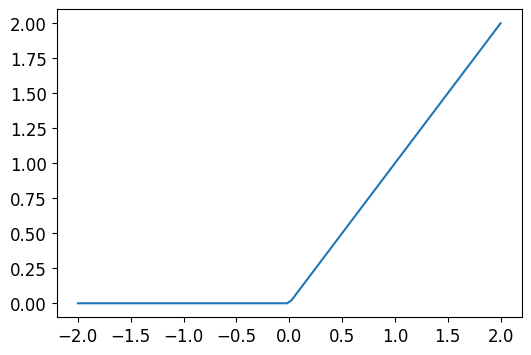

In [218]:
from fastbook import plot_function
plot_function(F.relu)

In [219]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [220]:
print(simple_net)

Sequential(
  (0): Linear(in_features=784, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
)


In [221]:
learn = Learner(
    dls,
    simple_net,
    opt_func=SGD,
    loss_func=mnist_loss,
    metrics=batch_accuracy
)

learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.350511,0.404969,0.505397,00:00
1,0.159050,0.238588,0.791953,00:00
2,0.085703,0.116667,0.916585,00:00
3,0.054909,0.077779,0.941119,00:00
4,0.040917,0.060487,0.957311,00:00
5,0.033934,0.050920,0.964181,00:00
6,0.030018,0.044943,0.966143,00:00
7,0.027526,0.040876,0.967615,00:00
8,0.025756,0.037928,0.967615,00:00
9,0.024396,0.035682,0.969087,00:00


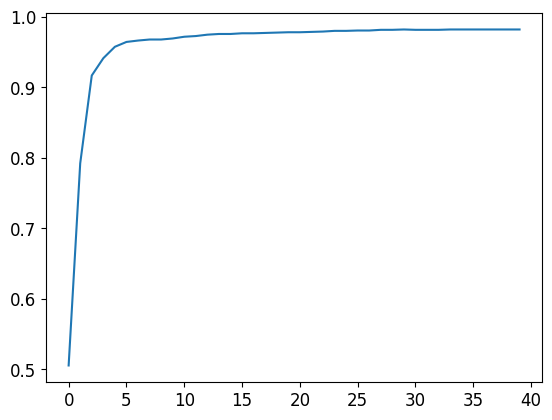

In [222]:
plt.plot(L(learn.recorder.values).itemgot(2))

In [225]:
learn.recorder.values[-1][2]

0.981844961643219